# Loan Growth Analysis of Missouri Banks
## Chelsea Brammer - Capstone Project 

In [377]:
import pandas as pd
df = pd.read_excel('c:\\Users\\cbram\\OneDrive\\Documents\\CSIS 44688 Capstone Project\\Banks of Missouri Q4 2023 - Client (1).xlsx')

new_df = df.drop(columns=['Rank', 'Date Open', 'Parent Name ', 'Charter Type', '"S" Corp', 'Return on Assets', 'Return on Equity', 
                 'Tier 1 Leverage Ratio', 'Equity / Assets', 'Offices', 'Deposits per Office', 'Staff', 'Assets Per Employee',
                'Cost per Employee', 'Total Assets.1', 'Yield on Loans', 'Cost of Funds', 'Deposit Growth Rate','Loans / Deposits',
                'Yield on Investmets (TE)', 'Net Interest Income (TE)', 'Dividend Payout', 'Debt / Assets','Brokered Deposits / Deposits', 
                'Non-Int Deposits / Deposits','Service Charges / Deposits', 'Non-Interest Income','Revenue per Employee YTD', 
                'Personnel Expense', 'Occupancy Expense','Other Expense', 'Total Overhead', 'Efficiency Ratio', 'Provision Expense', 
                 "NPA's / Equity + Reserves", 'Asset Quality Index', 'Net Income Q4 2023 Per Employee','Net Income Q4 2022', 'Net Income Q3 2023', 'Net Income Q4 2023',
                'Net Income 2021', 'Net Income 2022','Return on Assets.1', 'Return on Equity.1', 'Net Interest Rank','Non-Int Income Rank', 
                'Non-Int Expense Rank', 'Efficiency Rank',"NPA's Rank", 'Asset Quality Rank', 'ROA Rank', 'ROE Rank','Average of Rankings'])

print(new_df)

new_df.to_csv('missouri_banks_clean.csv', index=False)

                                 Company Name        City      State  \
0                                 Adrian Bank       Adrian  Missouri   
1                         The Bank of Advance      Advance  Missouri   
2                   Peoples Bank of Altenburg    Altenburg  Missouri   
3                                  Alton Bank        Alton  Missouri   
4                      First Independent Bank       Aurora  Missouri   
..                                        ...          ...       ...   
200           Community First Banking Company  West Plains  Missouri   
201        West Plains Bank and Trust Company  West Plains  Missouri   
202  West Plains Savings and Loan Association  West Plains  Missouri   
203                            Bank of Weston       Weston  Missouri   
204                                  FMB Bank  Wright City  Missouri   

      Latitude  Longitude  Total Assets  Loan Growth Rate  OREO  \
0    38.397518 -94.351616        177039            0.1066     0   
1

In [378]:
columns_list = list(new_df)

print(columns_list)

['Company Name', 'City ', 'State', 'Latitude', 'Longitude', 'Total Assets', 'Loan Growth Rate', 'OREO', 'Reserve / Loans', 'Past Due 30-89 Days', 'NPAs + 90 Day PDs', 'Net Charge Offs', 'Net Income 2023']


In [379]:
df_relevant = new_df.loc[new_df['Loan Growth Rate'] > 0.1]

print(df_relevant)

                 Company Name       City      State   Latitude  Longitude  \
0                 Adrian Bank      Adrian  Missouri  38.397518 -94.351616   
5         Belgrade State Bank    Belgrade  Missouri  37.786715 -90.849297   
6                    BTC Bank     Bethany  Missouri  40.268334 -94.028286   
8             Bloomsdale Bank  Bloomsdale  Missouri  38.009498 -90.217896   
10                   Limebank     Bolivar  Missouri  37.614484 -93.410475   
..                        ...         ...       ...        ...        ...   
183                 FCNB Bank  Steelville  Missouri  37.968100 -91.354868   
187   Heritage Community Bank       Union  Missouri  38.450052 -91.008476   
188      United Bank of Union       Union  Missouri  38.450052 -91.008476   
197        Bank of Washington  Washington  Missouri  38.558107 -91.012088   
199  American Bank Of Freedom  Wellsville  Missouri  39.071984 -91.570162   

     Total Assets  Loan Growth Rate   OREO  Reserve / Loans  \
0          1

In [380]:
new_df.describe()

,Latitude,Longitude,Total Assets,Loan Growth Rate,OREO,Reserve / Loans,Past Due 30-89 Days,NPAs + 90 Day PDs,Net Charge Offs,Net Income 2023
count,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,38.418869,-92.306318,1.209090e+06,0.088640,404.185366,0.012672,0.007805,0.003809,0.000685,15131.160976
std,1.101633,1.558470,4.322756e+06,0.115517,1612.018794,0.004074,0.012303,0.006284,0.001532,58312.422093
min,36.134234,-95.516929,3.521600e+04,-0.251100,0.000000,0.003300,0.000000,0.000000,-0.001400,-4487.000000
25%,37.614484,-93.568546,1.355540e+05,0.031700,0.000000,0.010700,0.001300,0.000400,0.000000,1151.000000
50%,38.608382,-92.263494,2.600690e+05,0.068000,0.000000,0.012300,0.003700,0.001800,0.000200,2987.000000
75%,39.145865,-91.008476,6.613540e+05,0.121600,50.000000,0.014100,0.008200,0.004400,0.000800,8273.000000
max,40.476961,-89.350631,4.372995e+07,0.889200,14106.000000,0.035000,0.105500,0.062700,0.013800,524424.000000


### Calculating the Average Loan Growth Rate 

In [381]:
Avg_Loan_Growth = new_df['Loan Growth Rate'].mean()

print(Avg_Loan_Growth)

0.08863951219512196


### Calculating the Average Past Due 30-89 Days

In [382]:
Avg_Past_Dues = df['Past Due 30-89 Days'].mean()

print(Avg_Past_Dues)

0.007805365853658538


### Calculating NPAs + 90 Days PDs 

In [383]:
Avg_NPAs = df['NPAs + 90 Day PDs'].mean()

print(Avg_NPAs)

0.0038092682926829276


### Calculating the Average Net Charge Offs

In [384]:
Avg_Charge_Offs = df['Net Charge Offs'].mean()

print(Avg_Charge_Offs)

0.0006853658536585366


### Top 10 Banks with Largest Loan Growth

In [385]:
new_df.nlargest(n=10, columns=['Loan Growth Rate'])

,Company Name,City,State,Latitude,Longitude,Total Assets,Loan Growth Rate,OREO,Reserve / Loans,Past Due 30-89 Days,NPAs + 90 Day PDs,Net Charge Offs,Net Income 2023
129,First Bank of the Lake,Osage Beach,Missouri,38.150311,-92.617962,972834,0.8892,0,0.0033,0.0047,0.0104,0.0005,9143
182,Stifel Bank,St. Louis,Missouri,38.627003,-90.199404,11965308,0.7198,0,0.0036,0.0000,0.0000,0.0000,91647
34,Neighbors Bank,Clarence,Missouri,39.741981,-92.258515,68390,0.4977,267,0.0047,0.0056,0.0074,0.0001,-4487
137,Connections Bank,Platte City,Missouri,39.370277,-94.782461,482789,0.3935,0,0.0105,0.0016,0.0000,0.0001,6436
118,Legacy Bank & Trust Company,Mountain Grove,Missouri,37.130608,-92.263494,1687753,0.3783,0,0.0113,0.0082,0.0080,0.0002,16558
126,Bank of Odessa,Odessa,Missouri,38.999175,-93.953556,556082,0.3705,0,0.0136,0.0256,0.0067,0.0002,7863
69,HNB National Bank,Hannibal,Missouri,39.708379,-91.358482,872446,0.3583,0,0.0105,0.0020,0.0011,-0.0001,14871
127,The Bank of Old Monroe,Old Monroe,Missouri,38.931718,-90.746792,725767,0.3287,0,0.0143,0.0002,0.0000,0.0002,15097
42,Sherwood Community Bank,Creighton,Missouri,38.494738,-94.073276,80126,0.3084,0,0.0086,0.0321,0.0039,0.0001,308
10,Limebank,Bolivar,Missouri,37.614484,-93.410475,107511,0.2760,0,0.0129,0.0073,0.0005,0.0000,1622


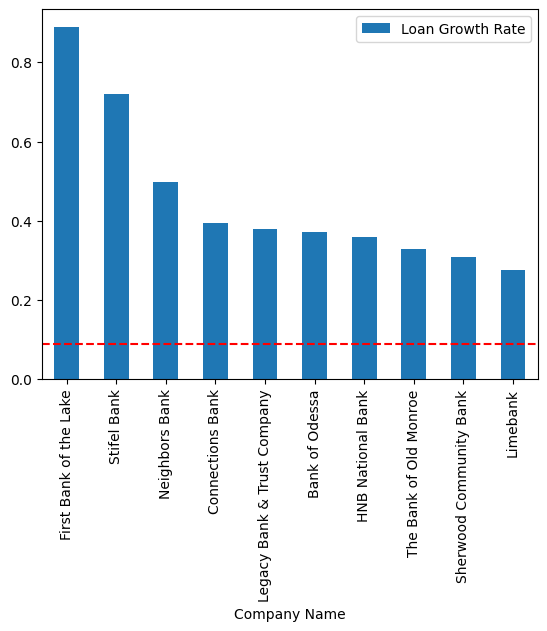

In [386]:
import matplotlib.pyplot as plt

top10growth = new_df.nlargest(n=10, columns='Loan Growth Rate')

top10growth.plot(kind='bar', x='Company Name', y='Loan Growth Rate')
plt.axhline(y=0.089, color='r', linestyle='--')
plt.show()

### Top 10 Banks with the Most Past Due Loans 30-89 Days

In [387]:
new_df.nlargest(n=10, columns=['Past Due 30-89 Days'])

,Company Name,City,State,Latitude,Longitude,Total Assets,Loan Growth Rate,OREO,Reserve / Loans,Past Due 30-89 Days,NPAs + 90 Day PDs,Net Charge Offs,Net Income 2023
128,The Bank of Orrick,Orrick,Missouri,39.212785,-94.122723,99940,0.0000,0,0.0044,0.1055,0.0018,0.0072,1310
202,West Plains Savings and Loan Association,West Plains,Missouri,36.728115,-91.852371,93085,0.0387,0,0.0122,0.0642,0.0240,0.0034,162
89,Lead Bank,Kansas City,Missouri,39.099727,-94.578567,935862,0.1214,800,0.0050,0.0612,0.0160,0.0032,17037
83,Kahoka State Bank,Kahoka,Missouri,40.420318,-91.719609,61782,-0.0632,0,0.0148,0.0425,0.0151,0.0049,117
167,Senath State Bank,Senath,Missouri,36.134234,-90.159818,108603,0.1016,0,0.0140,0.0423,0.0012,0.0000,1962
130,St. Clair County State Bank,Osceola,Missouri,38.046697,-93.704376,200444,0.0516,0,0.0124,0.0410,0.0029,0.0003,3083
93,Kennett Trust Bank,Kennett,Missouri,36.236176,-90.055649,132119,-0.0333,0,0.0102,0.0385,0.0021,0.0008,706
173,The Corner Stone Bank,South West City,Missouri,36.523198,-94.611467,179557,0.1054,50,0.0167,0.0365,0.0126,0.0023,1534
29,Security Bank of Southwest Missouri,Cassville,Missouri,36.678926,-93.868076,119204,0.1069,0,0.0113,0.0351,0.0048,-0.0001,2784
42,Sherwood Community Bank,Creighton,Missouri,38.494738,-94.073276,80126,0.3084,0,0.0086,0.0321,0.0039,0.0001,308


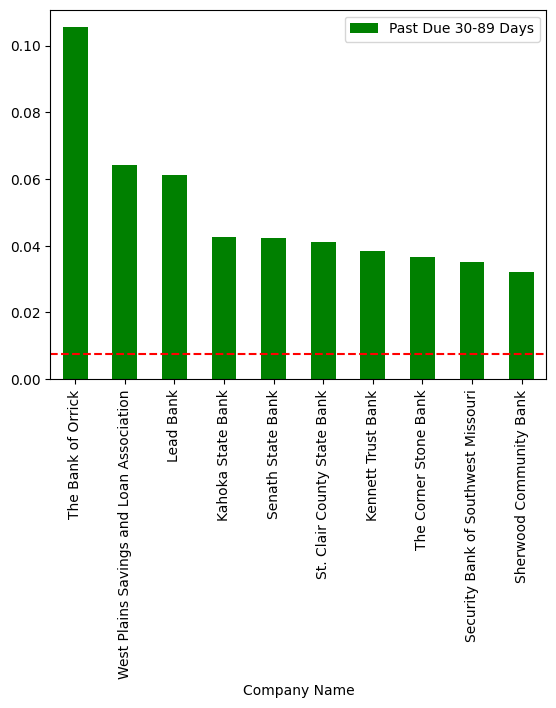

In [388]:
top10pds = new_df.nlargest(n=10, columns='Past Due 30-89 Days')

top10pds.plot(kind='bar', x='Company Name', y='Past Due 30-89 Days', color='green')
plt.axhline(y=0.0077, color='r', linestyle='--')
plt.show()

### Top 10 Banks with the Most NPAs + 90 Days Past Due Loans

In [389]:
new_df.nlargest(n=10, columns=['NPAs + 90 Day PDs'])

,Company Name,City,State,Latitude,Longitude,Total Assets,Loan Growth Rate,OREO,Reserve / Loans,Past Due 30-89 Days,NPAs + 90 Day PDs,Net Charge Offs,Net Income 2023
70,Paramount Bank,Hazelwood,Missouri,38.771440,-90.370949,94248,0.0323,1039,0.0118,0.0032,0.0627,0.0000,-3204
197,Bank of Washington,Washington,Missouri,38.558107,-91.012088,1101979,0.1225,12658,0.0153,0.0005,0.0291,0.0034,23536
24,Bank 21,Carrollton,Missouri,39.358354,-93.495767,167534,0.0349,0,0.0149,0.0138,0.0243,0.0000,2820
202,West Plains Savings and Loan Association,West Plains,Missouri,36.728115,-91.852371,93085,0.0387,0,0.0122,0.0642,0.0240,0.0034,162
82,Exchange Bank of Northeast Missouri,Kahoka,Missouri,40.420318,-91.719609,222229,0.0686,0,0.0134,0.0042,0.0200,0.0000,2757
192,Royal Banks of Missouri,University City,Missouri,38.668241,-90.332486,1043886,0.0382,14106,0.0073,0.0001,0.0173,0.0000,8962
162,Security Bank of Pulaski County,Saint Robert,Missouri,37.828096,-92.177666,144990,0.0877,2023,0.0123,0.0156,0.0165,0.0004,681
151,Citizens Bank of the Midwest,Rolla,Missouri,37.948544,-91.771530,211092,0.1456,3031,0.0142,0.0053,0.0161,0.0003,1586
89,Lead Bank,Kansas City,Missouri,39.099727,-94.578567,935862,0.1214,800,0.0050,0.0612,0.0160,0.0032,17037
83,Kahoka State Bank,Kahoka,Missouri,40.420318,-91.719609,61782,-0.0632,0,0.0148,0.0425,0.0151,0.0049,117


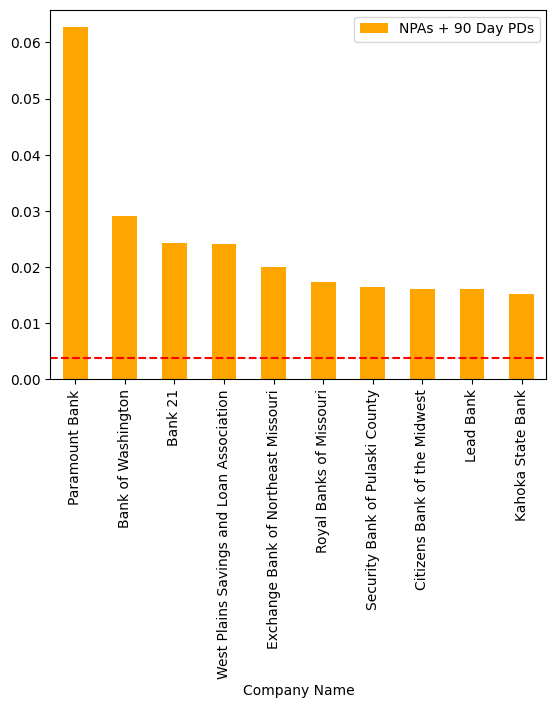

In [390]:
top10npas = new_df.nlargest(n=10, columns='NPAs + 90 Day PDs')

top10npas.plot(kind='bar', x='Company Name', y='NPAs + 90 Day PDs', color='orange')
plt.axhline(y=0.0038, color='r', linestyle='--')
plt.show()

### Top 10 Banks with the Most Charge Offs

In [391]:
new_df.nlargest(n=10, columns=['Net Charge Offs'])

,Company Name,City,State,Latitude,Longitude,Total Assets,Loan Growth Rate,OREO,Reserve / Loans,Past Due 30-89 Days,NPAs + 90 Day PDs,Net Charge Offs,Net Income 2023
100,First Federal Bank of Kansas City,Lees Summit,Missouri,38.910841,-94.382172,960134,-0.0130,690,0.0244,0.0075,0.0057,0.0138,564
128,The Bank of Orrick,Orrick,Missouri,39.212785,-94.122723,99940,0.0000,0,0.0044,0.1055,0.0018,0.0072,1310
9,America's Community Bank,Blue Springs,Missouri,39.016951,-94.281615,42246,0.0647,0,0.0107,0.0000,0.0000,0.0055,498
83,Kahoka State Bank,Kahoka,Missouri,40.420318,-91.719609,61782,-0.0632,0,0.0148,0.0425,0.0151,0.0049,117
144,Community Bank of Raymore,Raymore,Missouri,38.801953,-94.452729,334445,0.0863,0,0.0120,0.0017,0.0007,0.0049,5324
64,farmbank,Green City,Missouri,40.268632,-92.953261,77771,-0.0263,0,0.0124,0.0058,0.0051,0.0048,112
150,Citizens Bank of Rogersville,Rogersville,Missouri,37.116995,-93.055734,125227,0.0187,0,0.0105,0.0064,0.0013,0.0047,784
138,Community Bank of Pleasant Hill,Pleasant Hill,Missouri,38.787509,-94.269391,136159,0.1448,0,0.0059,0.0013,0.0001,0.0042,914
37,Midwest Regional Bank,Clayton,Missouri,38.642552,-90.323726,993966,0.1484,550,0.0120,0.0061,0.0038,0.0040,9373
35,Enterprise Bank & Trust,Clayton,Missouri,38.642552,-90.323726,14487768,0.1196,5736,0.0124,0.0012,0.0042,0.0037,203768


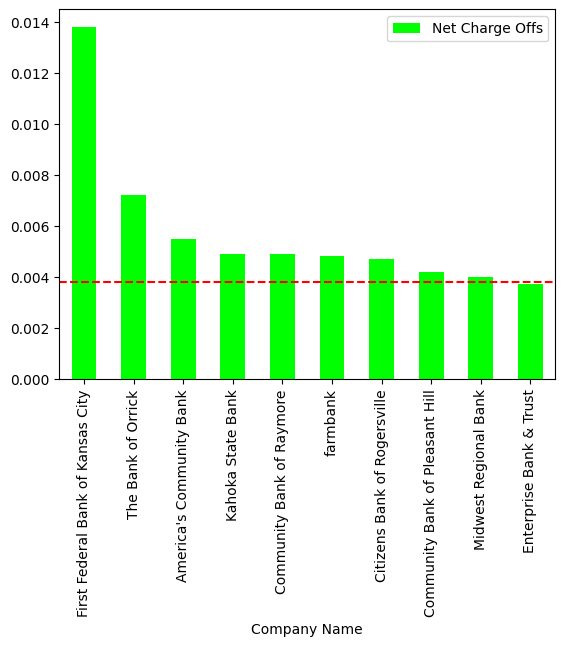

In [392]:
top10npas = new_df.nlargest(n=10, columns='Net Charge Offs')

top10npas.plot(kind='bar', x='Company Name', y='Net Charge Offs', color='lime')
plt.axhline(y=0.0038, color='r', linestyle='--')
plt.show()

### Correlations    

In [393]:
correlation_pastdue = new_df['Loan Growth Rate'].corr(new_df['Past Due 30-89 Days'])

print(correlation_pastdue)

-0.06686201262030513


In [394]:
correlation_npas = new_df['Loan Growth Rate'].corr(new_df['NPAs + 90 Day PDs'])

print(correlation_npas)

-0.013710161045139037


In [395]:
correlation_chargeoffs = new_df['Loan Growth Rate'].corr(new_df['Net Charge Offs'])

print(correlation_chargeoffs)

-0.10120122474601605


In [396]:
correlations = df_relevant['Loan Growth Rate'].corr(df_relevant['Net Charge Offs'])

print(correlations)

-0.1534515290018388


#### Predictive Analysis

In [296]:
columns_to_exclude = ['Company Name', 'City ', 'State', 'Latitude', 'Longitude']
numeric_df = new_df.drop(columns=columns_to_exclude)

In [408]:
# Import necessary libraries
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'numeric_df' is your DataFrame after pre-processing

# Define the column to predict
col_predict = 'Net Charge Offs'

# Split data into features (X) and target (y)
X = numeric_df.drop(columns=[col_predict])
y = numeric_df[col_predict]

# Handle missing values in X using SimpleImputer or any other method as required
# Assuming NaN values can be in X as well, so we handle them here
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer_X.fit_transform(X)

# Handle missing values in y using SimpleImputer
imputer_y = SimpleImputer(missing_values=np.nan, strategy='mean')
y = np.array(imputer_y.fit_transform(y).reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = HistGradientBoostingClassifier(max_iter=1000)

# Train the model using the imputed target values
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train Score: {train_score:.2f}, Test Score: {test_score:.2f}")

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.0004  0.0008  0.     -0.0004  0.0004  0.0028  0.0001 -0.0001  0.0012
  0.0055  0.     -0.0002  0.0002 -0.0002  0.0001  0.      0.0001  0.0001
  0.0004  0.0003  0.0013  0.0001  0.0001 -0.0001  0.     -0.0001  0.0001
  0.0011  0.     -0.0001  0.0001  0.0007  0.0002  0.0009  0.0001  0.0037
  0.      0.004   0.0025  0.0011  0.0002  0.0013  0.0001 -0.0008  0.0005
  0.      0.0002  0.0008  0.      0.0018  0.0015  0.0003  0.      0.001
  0.0004  0.0002  0.0007  0.0001 -0.0014  0.0015  0.0004  0.      0.0023
  0.      0.0048  0.0018 -0.0001  0.      0.0005 -0.0001  0.      0.0002
  0.      0.0003  0.0024  0.0009  0.0002  0.0002  0.0003 -0.0004  0.0012
  0.0001  0.      0.0049  0.      0.0014 -0.0001  0.0019  0.0008  0.0032
  0.0005  0.0003 -0.0003  0.0008  0.0005 -0.0002 -0.0002  0.0001  0.
  0.0002  0.0138  0.0025 -0.0003  0.0012  0.0003  0.0005  0.      0.0002
  0.      0.     -0.0002  0.0004 -0.0003  0.0006  0.0003  0.0009  0.0002
  0.0001  0.0002  0.0005  0.0002  0.0003 -0.0002  0.      0.0001  0.
  0.0002  0.0002  0.0072  0.0005  0.0003  0.      0.0001  0.0002  0.
  0.0017 -0.0001  0.0001  0.0042  0.0007 -0.0009  0.0004  0.0001  0.001
  0.0049  0.0002  0.0002  0.      0.      0.0001  0.0047  0.0003  0.
  0.0009  0.0002  0.0002  0.0022  0.0003  0.0001 -0.0001  0.0006  0.
  0.0004 -0.0001  0.0002  0.0008  0.0004  0.      0.0001  0.0001  0.0018
  0.      0.      0.0023  0.0002 -0.0003  0.001   0.0002  0.0002  0.
 -0.0001  0.0003  0.     -0.0007  0.002   0.0002 -0.0002  0.      0.0025
  0.002  -0.0014 -0.0002  0.      0.      0.0014  0.0001  0.0001  0.0034
  0.0036  0.0004  0.0002  0.0006  0.0034 -0.0005 -0.0003].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.